In [2]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import seaborn as sns

/home/icaro/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
df = pd.read_csv('./datasets/final_dataset/appointments.csv')

In [7]:
## Extracting derived data from dataset

df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

df['scheduled_dow'] = df['scheduled_day'].dt.weekday_name
df = df.rename(columns={'day_of_the_week': 'appointment_dow'})

df.head()

,age,gender,scheduled_day,appointment_day,appointment_dow,status,diabetes,alcholism,hypertension,handicap,smokes,scholarship,tuberculosis,sms_received,awaiting_time,temperature,scheduled_dow
0,59,F,2013-12-30,2014-01-02,Thursday,Show-Up,1,0,1,0,0,0,0,0,-3,32.9,Monday
1,54,F,2013-12-16,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,-17,32.9,Monday
2,63,F,2013-12-02,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,0,-31,32.9,Monday
3,42,F,2013-12-18,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,32.9,Wednesday
4,66,M,2013-12-02,2014-01-02,Thursday,No-Show,0,0,0,0,0,0,0,1,-31,32.9,Monday


In [8]:
print("The shape of the DataFrame {}".format(df.shape))

The shape of the DataFrame (300000, 17)


In [9]:
percent_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
percent_missing

scheduled_dow      0.0
alcholism          0.0
gender             0.0
scheduled_day      0.0
appointment_day    0.0
appointment_dow    0.0
status             0.0
diabetes           0.0
hypertension       0.0
temperature        0.0
handicap           0.0
smokes             0.0
scholarship        0.0
tuberculosis       0.0
sms_received       0.0
awaiting_time      0.0
age                0.0
dtype: float64

In [11]:
df['appointment_day'] = np.where((df['appointment_day'] - df['scheduled_day']).dt.days < 0, df['scheduled_day'], df['appointment_day'])

# Get the Waiting Time in Days of the Patients.
df['awaiting_time'] = df['appointment_day'] - df['scheduled_day']
df['awaiting_time'] = df['awaiting_time'].dt.days

df.head()

,age,gender,scheduled_day,appointment_day,appointment_dow,status,diabetes,alcholism,hypertension,handicap,smokes,scholarship,tuberculosis,sms_received,awaiting_time,temperature,scheduled_dow
0,59,F,2013-12-30,2014-01-02,Thursday,Show-Up,1,0,1,0,0,0,0,0,3,32.9,Monday
1,54,F,2013-12-16,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,17,32.9,Monday
2,63,F,2013-12-02,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,0,31,32.9,Monday
3,42,F,2013-12-18,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,32.9,Wednesday
4,66,M,2013-12-02,2014-01-02,Thursday,No-Show,0,0,0,0,0,0,0,1,31,32.9,Monday


Text(0, 0.5, 'Probability')

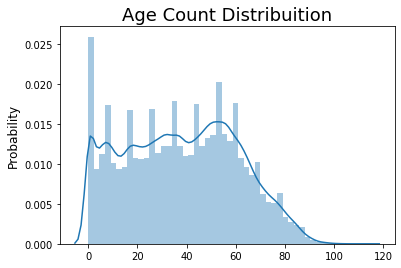

In [12]:
df = df[df.age >= 0]

g = sns.distplot(df['age'])
g.set_title("Age Count Distribuition", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=12)

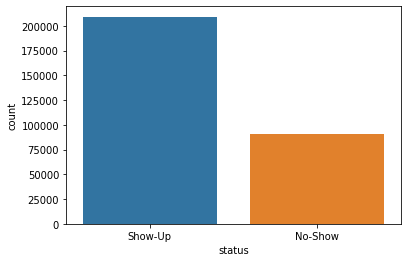

In [13]:
g = sns.countplot(df['status'])

In [ ]:
# g = sns.pairplot(df);

In [15]:
print("Max value in `temperature` => {}".format(df.temperature.max()))
print("Min value in `temperature` => {}".format(df.temperature.min()))

Max value in `temperature` => 36.0
Min value in `temperature` => 20.8


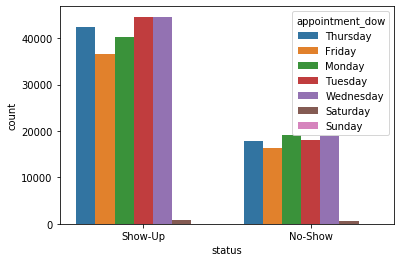

In [16]:
ax = sns.countplot(x="status", hue="appointment_dow", data=df)

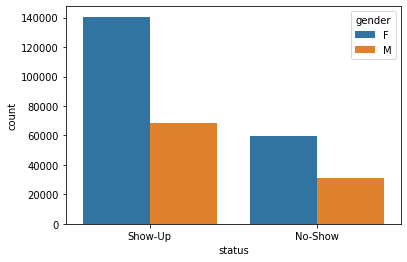

In [17]:
ax = sns.countplot(x="status", hue="gender", data=df)

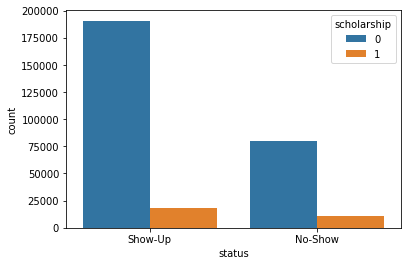

In [18]:
ax = sns.countplot(x="status", hue="scholarship", data=df)

Text(0, 0.5, 'Probability')

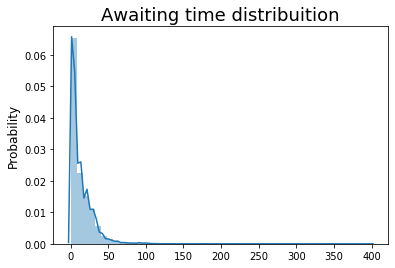

In [19]:
g = sns.distplot(df['awaiting_time'])
g.set_title("Awaiting time distribuition", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=12)

In [30]:
#feature encoding
import sklearn.preprocessing as preprocessing

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,appointment_dow,status,scheduled_dow
0,F,Thursday,Show-Up,Monday
1,F,Thursday,Show-Up,Monday
2,F,Thursday,Show-Up,Monday
3,F,Thursday,Show-Up,Wednesday
4,M,Thursday,No-Show,Monday


In [31]:
obj_df[obj_df.isnull().any(axis=1)]

,gender,appointment_dow,status,scheduled_dow


In [32]:
df['gender'] = preprocessing.LabelEncoder().fit_transform(df['gender'])
df['status'] = preprocessing.LabelEncoder().fit_transform(df['gender'])
df['scheduled_dow'] = preprocessing.LabelEncoder().fit_transform(df['gender'])
df['appointment_dow'] = preprocessing.LabelEncoder().fit_transform(df['gender'])
df['appointment_day'] = preprocessing.LabelEncoder().fit_transform(df['gender'])
df['scheduled_day'] = preprocessing.LabelEncoder().fit_transform(df['gender'])

df.head()

,age,gender,scheduled_day,appointment_day,appointment_dow,status,diabetes,alcholism,hypertension,handicap,smokes,scholarship,tuberculosis,sms_received,awaiting_time,temperature,scheduled_dow
0,59,0,0,0,0,0,1,0,1,0,0,0,0,0,3,32.9,0
1,54,0,0,0,0,0,0,0,0,0,0,0,0,1,17,32.9,0
2,63,0,0,0,0,0,0,0,0,0,0,0,0,0,31,32.9,0
3,42,0,0,0,0,0,0,0,0,0,0,0,0,1,15,32.9,0
4,66,1,1,1,1,1,0,0,0,0,0,0,0,1,31,32.9,1


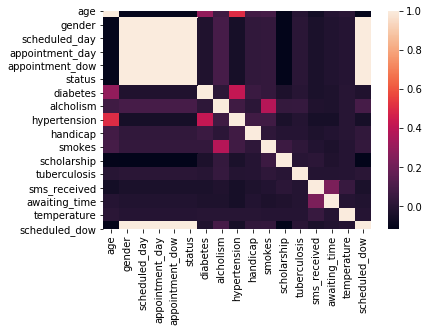

In [33]:
corr = df.corr()
sns.heatmap(corr)